In [1]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/My Courses/Yolov8-seg

/content/drive/My Drive/My Courses/Yolov8-seg


In [3]:
#setting up the environment
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
ROOT_PATH = "/content/drive/My Drive/My Courses/Yolov8-seg"

In [6]:
!pwd

/content/drive/MyDrive/My Courses/Yolov8-seg


In [7]:

%cd "/content/drive/My Drive/My Courses/Yolov8-seg"

/content/drive/My Drive/My Courses/Yolov8-seg


In [8]:

!pwd

/content/drive/My Drive/My Courses/Yolov8-seg


In [9]:
!ls

cell_data  data.yaml  runs  yolov8s-seg.pt


In [13]:
#training the model
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=100 imgsz=640 save=true batch=16

100% 22.8M/22.8M [00:00<00:00, 127MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, d

In [14]:
#Validate Custom Model
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt conf=0.25 source=cell_data/valid/images data=data.yaml save=tru

2024-04-25 19:56:47.085432: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 19:56:47.085518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 19:56:47.087049: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 19:56:48.200367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/My Courses/Yolov8-seg/cell_dat

In [15]:
#Inference with Custom Model
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=cell_data/test/images save=tru

2024-04-25 19:57:03.213850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 19:57:03.213920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 19:57:03.215857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 19:57:04.835041: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
image 1/5 /content/drive/MyDrive/My Courses/Yolov8-seg/cell_data/te

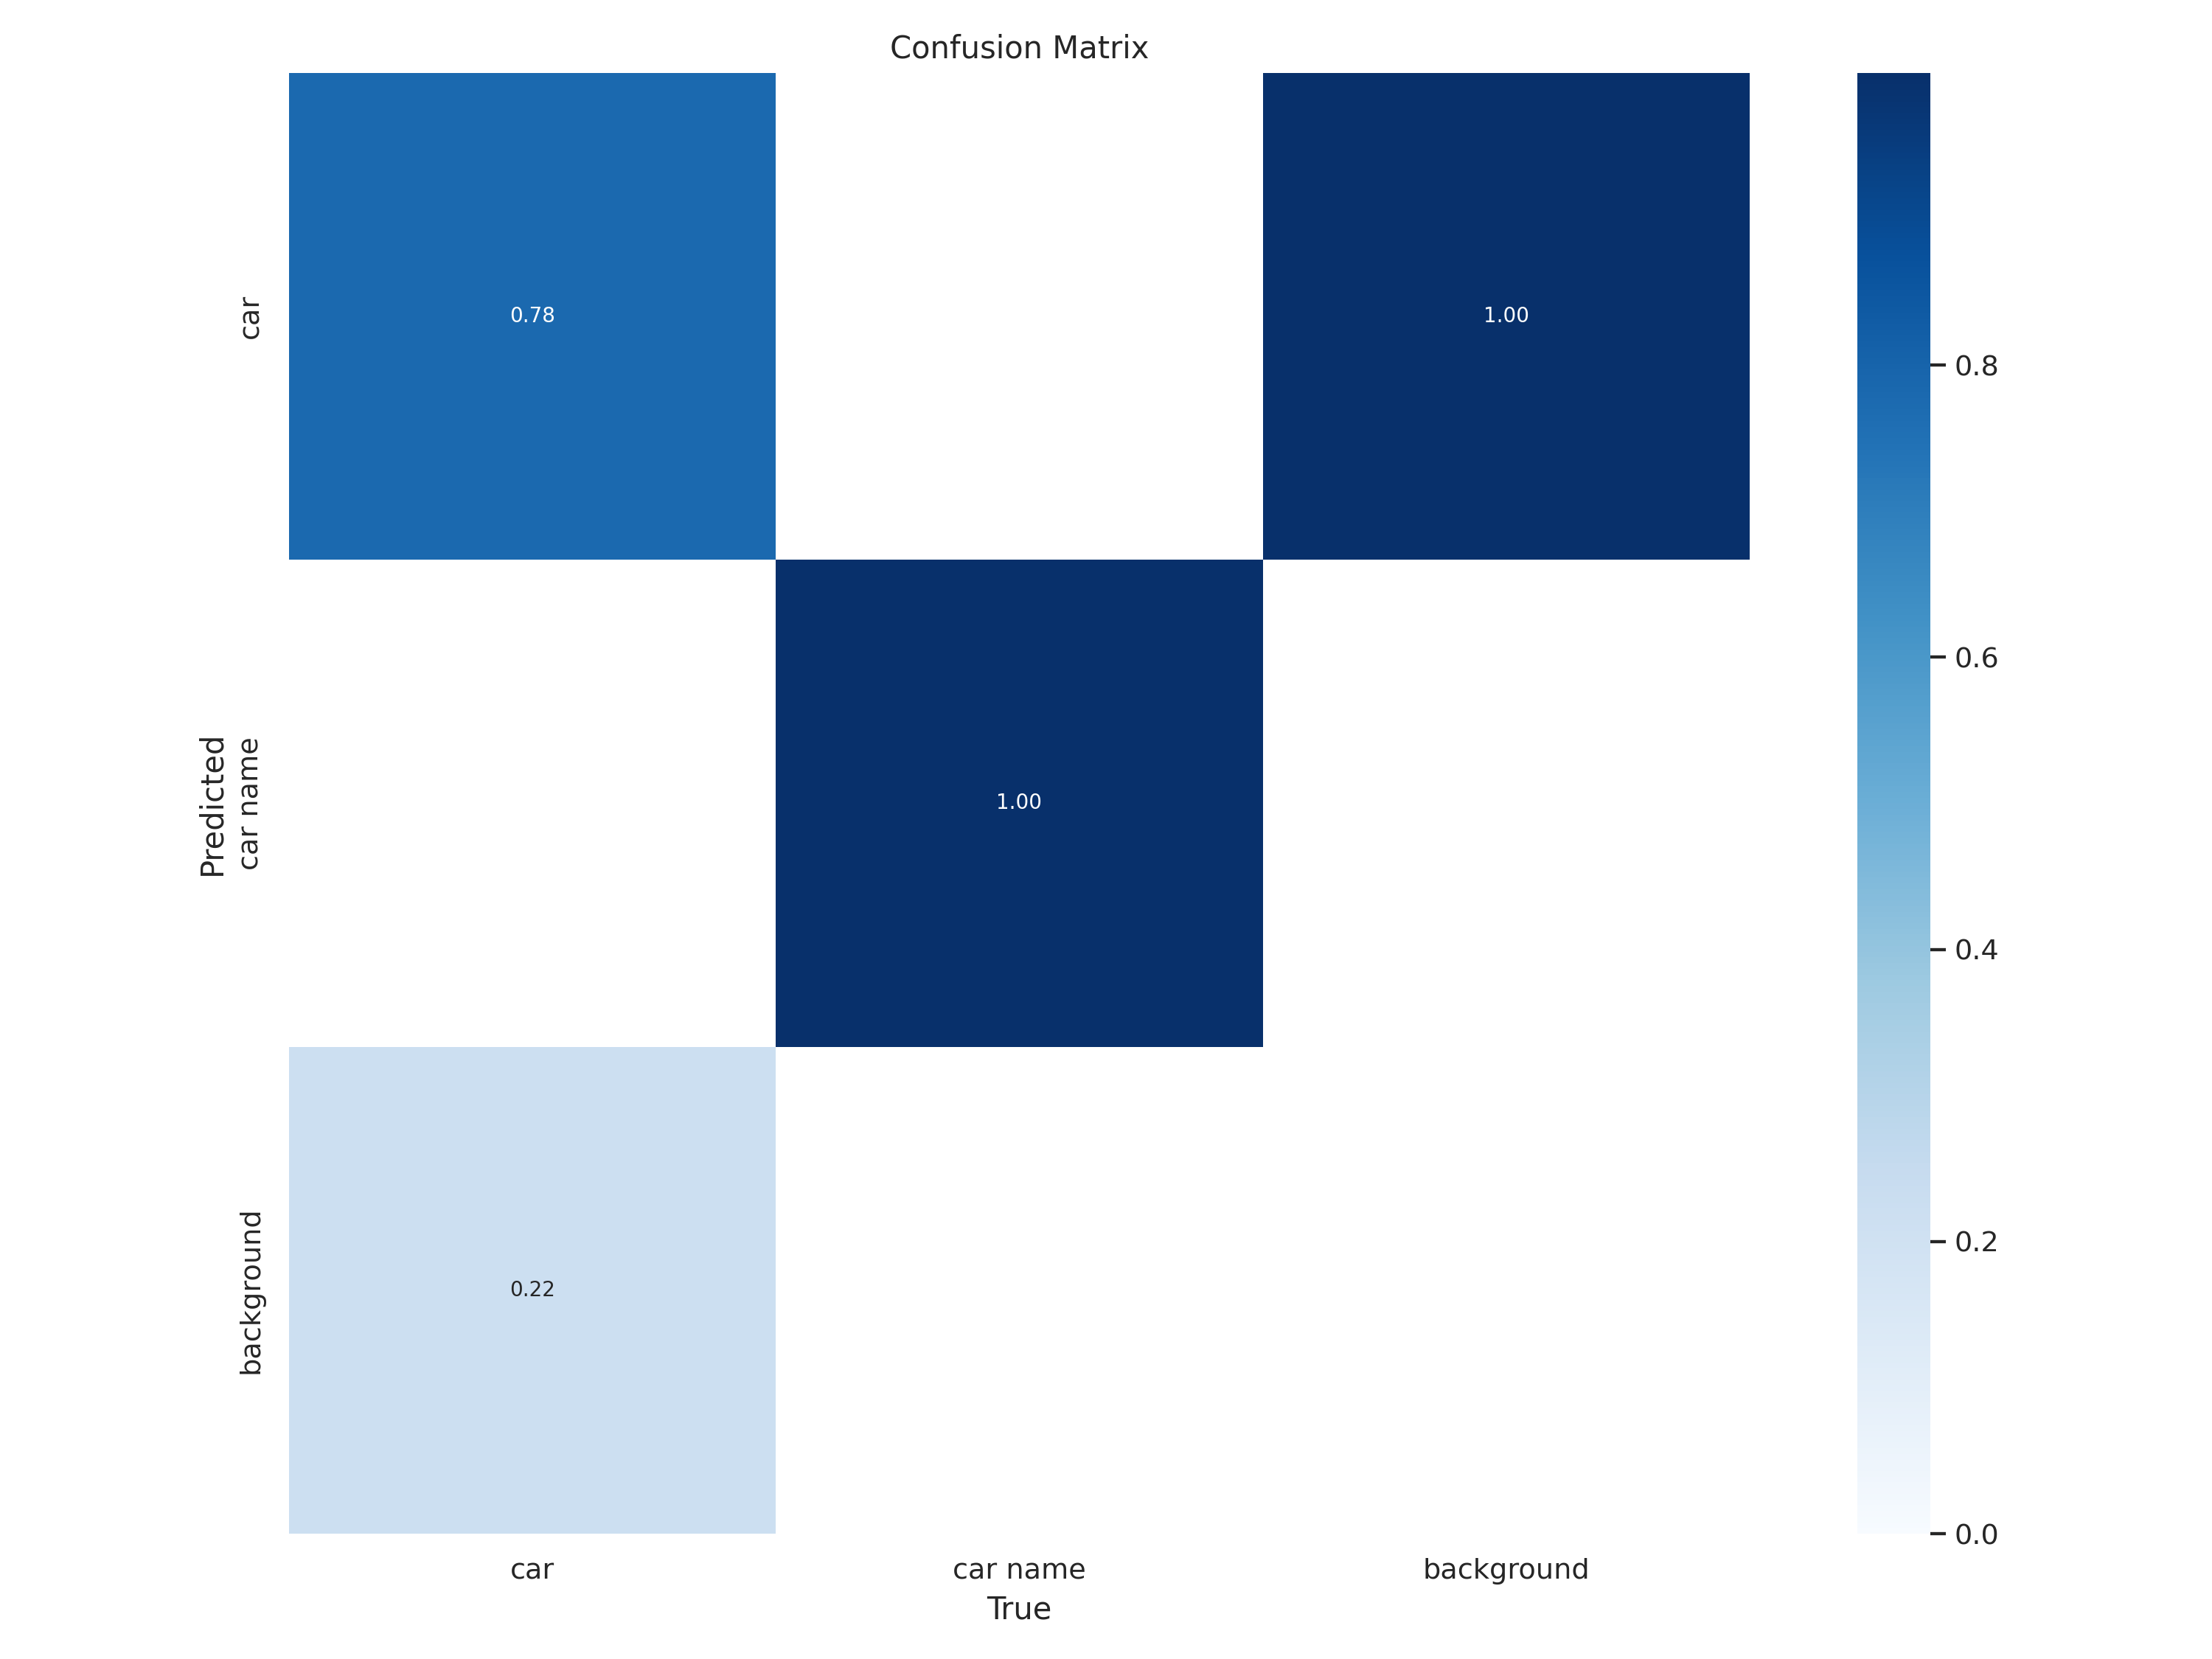

In [16]:
#displaying the confusion matrix
Image(filename='/content/drive/MyDrive/My Courses/Yolov8-seg/runs/segment/train/confusion_matrix.png', width=600)

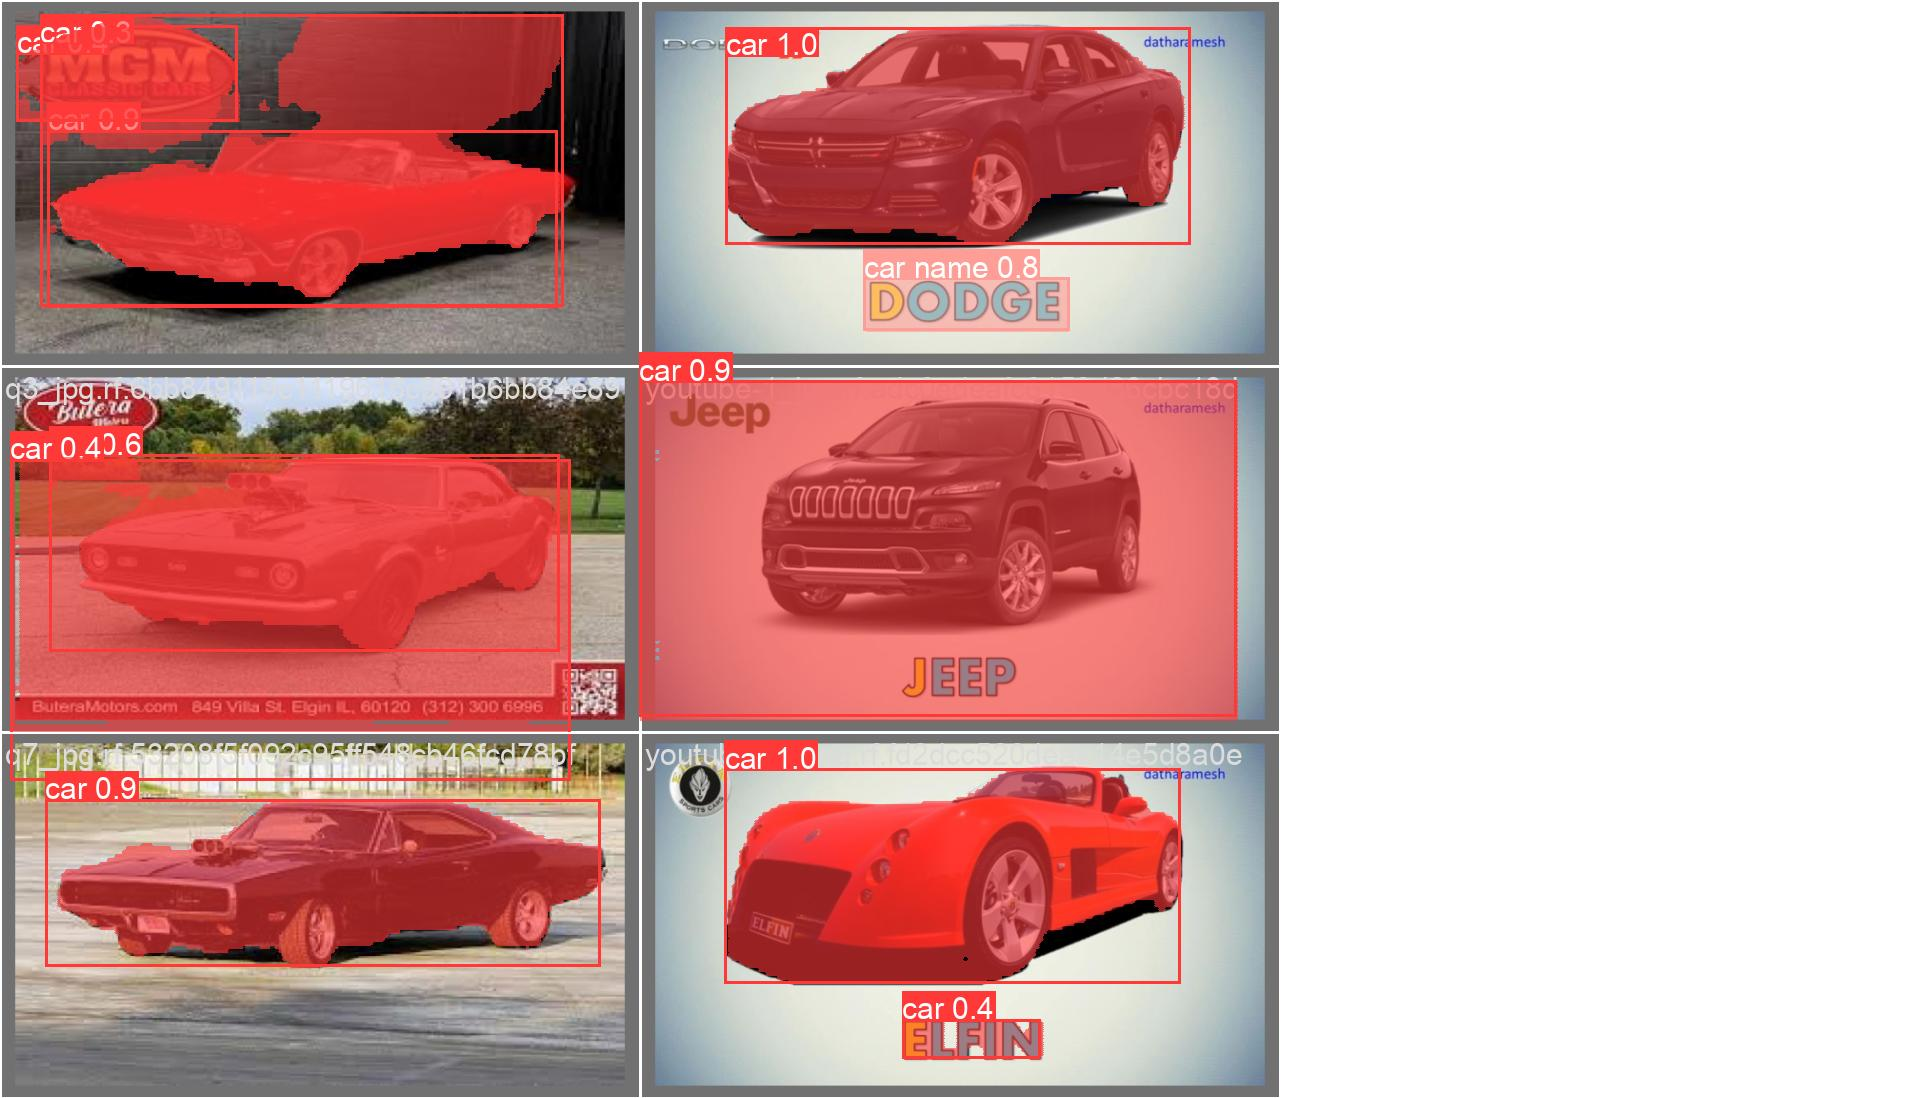

In [17]:
#displaying the val images
Image(filename='/content/drive/MyDrive/My Courses/Yolov8-seg/runs/segment/train/val_batch0_pred.jpg', width=600)


In [18]:
import pandas as pd

In [19]:
results=pd.read_csv('/content/drive/MyDrive/My Courses/Yolov8-seg/runs/segment/train/results.csv')

In [20]:
results

,epoch,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,...,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,1.24280,5.5393,3.00430,1.47280,...,2.12470,1.7512,0.099100,0.000100,0.000100
1,1,1.31690,5.6237,3.14810,1.63800,...,2.08750,1.7421,0.097297,0.000297,0.000297
2,2,1.23980,5.4897,3.15630,1.53460,...,2.06100,1.7374,0.095490,0.000490,0.000490
3,3,1.26350,5.2326,3.24250,1.40270,...,1.97400,1.7708,0.093679,0.000679,0.000679
4,4,1.24050,5.8722,2.97180,1.41460,...,2.13150,1.3035,0.091864,0.000864,0.000864
...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.40097,1.3467,0.61265,0.94748,...,0.47423,1.0450,0.000694,0.000694,0.000694
96,96,0.36786,1.6253,0.59988,0.92906,...,0.47423,1.0450,0.000595,0.000595,0.000595
97,97,0.40564,1.5002,0.62675,0.91634,...,0.48583,1.0430,0.000496,0.000496,0.000496
98,98,0.33883,1.3525,0.62498,0.89213,...,0.48583,1.0430,0.000397,0.000397,0.000397
